In [1]:
N = ord("D") % 15 + 1
print(N)

9


In [2]:
import time
from functools import wraps
import numpy as np
import random

In [3]:
def time_it(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Function '{func.__name__}' executed in: {elapsed_time:.6f} seconds")
        return result
    return wrapper

## First part

Виконати набір вправ. Всі завдання виконати 2 способами: 
а) з використанням універсальних функцій бібліотеки NumPy [4]. 
b) за допомогою ітеративних конструкцій (з використанням циклів, 
спискових включень тощо). 
с) для обох випадків підрахувати час виконання скрипту та зробити 
висновок.

Tasks: 1, 2, 4, 7, 8, 12, 15, 16, 20 

### Task 1
Вводиться число n. Вивести масив разміра nхn, в якому по 
діагоналі йдуть числа від 1 до n, а інші числа рівні 0 

In [4]:
n = 10
@time_it
def task_1_numpy(n):
    matrix = np.diag(np.arange(1, n + 1))
    print(matrix)

task_1_numpy(n)

[[ 1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
Function 'task_1_numpy' executed in: 0.000624 seconds


In [5]:
n = 10
@time_it
def task_1_manual(n):
    for i in range(1, n + 1):
        llist = [0 for i in range(n)]
        llist[i-1] = i
        print(llist)
task_1_manual(n)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 6, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 7, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 8, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 9, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 10]
Function 'task_1_manual' executed in: 0.000290 seconds


### Task 2
Вводиться число n. Розставити 1 та 0 у шаховому порядку, 
починаючи з 1 в матриці розміром nхn, використовуючи слайсінг. 

In [6]:
@time_it
def task_2_numpy(n):
    return (np.indices((n, n)).sum(axis=0) % 2)
n = 8
print(task_2_numpy(n))

Function 'task_2_numpy' executed in: 0.000110 seconds
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [7]:
@time_it
def task_2_manual(n):
    result = []
    for i in range(n):
        if i % 2 == 0:
            result.append([i % 2 for i in range(0, n)])
        else:
            result.append([i % 2 for i in range(1, n+1)])
    return result
n = 8
matrix = task_2_manual(n)
for row in matrix:
    print(row)

Function 'task_2_manual' executed in: 0.000008 seconds
[0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0]


### Task 4
Вводяться числа n і m. Вивести масив розміру n на m, в якому у 
першому рядку (рядок з нулевим індексом) йдуть числа від 0 до m-1, а всі 
інші елементи матриці дорівнюють 0.

In [8]:
@time_it
def task_4_numpy(m, n):
    mat = np.zeros((n, m), dtype=int)
    mat[0] = np.arange(m)
    return mat
n, m = 10, 4
print(task_4_numpy(n, m))

Function 'task_4_numpy' executed in: 0.000047 seconds
[[0 1 2 3 4 5 6 7 8 9]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [9]:
@time_it
def task_4_manual(m, n):
    result = [[i for i in range(m)]]
    for i in range(n):
        result.append([0 for i in range(m)])
    return result
n, m = 10, 4
matrix = task_4_manual(n, m)
for row in matrix:
    print(row)

Function 'task_4_manual' executed in: 0.000005 seconds
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Task 7
З клавіатури вводиться масив. Замінити всі нульові елементи на -1.

In [10]:
@time_it
def task_7_numpy(input_arr):
    arr = np.array(input_arr)
    arr[arr == 0] = -1
    
    return arr

input_arr = [0, 1, 2, 3, 0, 5, 6, 0, 8, 9]

print(task_7_numpy(input_arr))

Function 'task_7_numpy' executed in: 0.000108 seconds
[-1  1  2  3 -1  5  6 -1  8  9]


In [11]:
@time_it
def task_7_manual(input_arr):
    return [-1 if x == 0 else x for x in input_arr]

input_arr = [0, 1, 2, 3, 0, 5, 6, 0, 8, 9]

print(task_7_manual(input_arr))

Function 'task_7_manual' executed in: 0.000002 seconds
[-1, 1, 2, 3, -1, 5, 6, -1, 8, 9]


### Task 8
З клавіатури вводиться масив. Підрахувати в ньому кількість 
нульових та ненульвих елементів. 

In [12]:
@time_it
def task_8_numpy(input_arr):
    arr = np.array(input_arr)

    count_zeros = (arr == 0).sum()
    count_not_zero = (arr != 0).sum()
    
    return [count_zeros, count_not_zero]

input_arr = [0, 1, 2, 3, 0, 5, 6, 0, 8, 9]

count_zeros, count_not_zero = task_8_numpy(input_arr)
print("Нулів:", count_zeros)
print("Не нулів:", count_not_zero)

Function 'task_8_numpy' executed in: 0.000081 seconds
Нулів: 3
Не нулів: 7


In [13]:
@time_it
def task_8_manual(input_arr):
    count_zeros = sum(1 for i in input_arr if i == 0)
    count_not_zero = sum(1 for i in input_arr if i != 0)
    
    return [count_zeros, count_not_zero]

input_arr = [0, 1, 2, 3, 0, 5, 6, 0, 8, 9]

count_zeros, count_not_zero = task_8_manual(input_arr)
print("Нулів:", count_zeros)
print("Не нулів:", count_not_zero)

Function 'task_8_manual' executed in: 0.000003 seconds
Нулів: 3
Не нулів: 7


### Task 12
Створити масив одиниць розміром n х n та створити в ньому 
«рамку», сформовану з 0.

In [14]:
@time_it
def task_12_numpy(n):
    mat = np.ones((n, n), dtype=int)
    mat[0, :] = 0
    mat[-1, :] = 0
    mat[:, 0] = 0
    mat[:, -1] = 0
    return mat

n = 8
print(task_12_numpy(n))

Function 'task_12_numpy' executed in: 0.000033 seconds
[[0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0]]


In [15]:
@time_it
def task_12_manual(n):
    result = [[0 for i in range(n)]]
    arr = [1 for i in range(n)]
    arr[0] = 0
    arr[-1] = 0
    for i in range(n-2):
        result.append(arr[:])
    result.append([0 for i in range(n)])
    return result

n = 8
matrix = task_12_manual(n)
for row in matrix:
    print(row)

Function 'task_12_manual' executed in: 0.000011 seconds
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


### Task 15
Заповнити парні стовбчики матриці розміром n х n одиницями, а 
непарні – нулями. 

In [16]:
@time_it
def task_15_numpy(n):
    mat = np.zeros((n, n), dtype=int)
    mat[:, 1::2] = 1
    return mat

n = 5
print(task_15_numpy(n))

Function 'task_15_numpy' executed in: 0.000049 seconds
[[0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]]


In [17]:
@time_it
def task_15_manual(n):
    result = []
    for i in range(n):
        result.append([0 if i % 2 == 0 else 1 for i in range(n)])
    return result

n = 5
matrix = task_15_manual(n)
for row in matrix:
    print(row)

Function 'task_15_manual' executed in: 0.000006 seconds
[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]


### Task 16
Заповнити вектор значеннями від 0 до n. Всі значення, що більші 
за n/4 та менші за 3n/4 замінити нулями 

In [18]:
@time_it
def task_16_numpy(n):
    vec = np.arange(0, n + 1)
    condition = (vec > n/4) & (vec < 3*n/4)
    vec[condition] = 0
    
    return vec

n = 10
print(task_16_numpy(n))

Function 'task_16_numpy' executed in: 0.000141 seconds
[ 0  1  2  0  0  0  0  0  8  9 10]


In [19]:
@time_it
def task_16_manual(n):
    result = []
    for i in range(n+1):
        if (i > n/4) and (i < 3*n/4):
            result.append(0)
        else:
            result.append(i)
    
    return result

n = 10
print(task_16_numpy(n))

Function 'task_16_numpy' executed in: 0.000061 seconds
[ 0  1  2  0  0  0  0  0  8  9 10]


### Task 20
Згенерувати вектор із n випадкових елементів, що лежать в 
інтервалі (0,1). Замінити максимальний елемент на 0. 

In [20]:
@time_it
def task_20_numpy(n):
    vector_floats = np.random.rand(n)
    original_vector = vector_floats.copy()
    max_val = np.max(vector_floats)
    vector_floats[vector_floats == max_val] = 0
    
    return [original_vector, vector_floats]

n = 5
original_vector, vector_floats = task_20_numpy(n)
print("Початковий вектор:", original_vector)
print("Змінений вектор:", vector_floats)

Function 'task_20_numpy' executed in: 0.303453 seconds
Початковий вектор: [0.91930208 0.8658857  0.54674177 0.64694242 0.59201965]
Змінений вектор: [0.         0.8658857  0.54674177 0.64694242 0.59201965]


In [21]:
@time_it
def task_20_manual(n):
    result = []
    max_val = 0
    max_ind = 0
    for i in range(n):
        val = random.random()
        if val > max_val:
            max_ind = i
            max_val = val
        
        result.append(val)
        
    original_vector = result[:]
    result[max_ind] = 0
    
    return [original_vector, result]

n = 5
original_vector, vector_floats = task_20_manual(n)
print("Початковий вектор:", original_vector)
print("Змінений вектор:", vector_floats)

Function 'task_20_manual' executed in: 0.000006 seconds
Початковий вектор: [0.8578418179643214, 0.6560221808061714, 0.27656872737624194, 0.5995530016874269, 0.10677609124148146]
Змінений вектор: [0, 0.6560221808061714, 0.27656872737624194, 0.5995530016874269, 0.10677609124148146]


## Second Part

Розв’язати систему за допомогою формул Крамера і виконати перевірку за 
допомогою: 
a) матричного множення; 
b) оберненої матриці; 
c) функції numpy.linalg.solve(). 
Порівняти всі рішення за допомогою функції numpy.allclose()


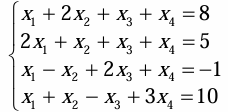

In [25]:
from sympy import symbols, Eq, linear_eq_to_matrix
from sympy.parsing.latex import parse_latex


x_1, x_2, x_3, x_4 = symbols("x_1 x_2 x_3 x_4")

local_dict = {
    "x_1": x_1,
    "x_2": x_2,
    "x_3": x_3,
    "x_4": x_4,
}

latex_eqs = [
    r"x_{1} + 2x_{2} + x_{3} + x_{4} = 8",
    r"2x_{1} + x_{2} + x_{3} + x_{4} = 5",
    r"x_{1} - x_{2} + 2x_{3} + x_{4} = -1",
    r"x_{1} + x_{2} - x_{3} + 3x_{4} = 10"
]

equations = [parse_latex(eq) for eq in latex_eqs]


variables = list(sorted(
    {sym for eq in equations for sym in eq.free_symbols},
    key=lambda s: str(s)
))

A, b = linear_eq_to_matrix(equations, variables)

print("Variables:", variables)
print("Matrix A:")
print(A)
print("Vector b:")
print(b)

Variables: [x_{1}, x_{2}, x_{3}, x_{4}]
Matrix A:
Matrix([[1, 2, 1, 1], [2, 1, 1, 1], [1, -1, 2, 1], [1, 1, -1, 3]])
Vector b:
Matrix([[8], [5], [-1], [10]])


In [29]:
def cramers_rule(A, b):
    A = np.array(A, dtype=int)
    b = np.array(b, dtype=int)

    det_A = np.linalg.det(A)
    if det_A == 0:
        raise ValueError("System has no unique solution")

    solutions = []
    for i in range(len(b)):
        A_copy = A.copy()
        A_copy[:, i] = b.flatten()
        solutions.append(np.linalg.det(A_copy) / det_A)

    return np.array(solutions)

print(cramers_rule(A, b))

[-0.05263158  2.94736842 -0.15789474  2.31578947]


In [33]:
def inverse_matrix_multiplication(A, b):
    A_org = np.array(A, dtype=np.float64)
    A_inv = np.linalg.inv(A_org)
    x = np.dot(A_inv, b)

    return x

print(inverse_matrix_multiplication(A, b))

[[-0.0526315789473689]
 [2.94736842105263]
 [-0.157894736842106]
 [2.31578947368421]]


In [37]:
def np_native_solve(A, b):
    A_org = np.array(A, dtype=np.float64)
    b_org = np.array(b, dtype=np.float64)
    x = np.linalg.solve(A_org, b_org)
    return x

print(np_native_solve(A, b))

[[-0.05263158]
 [ 2.94736842]
 [-0.15789474]
 [ 2.31578947]]


In [42]:
cramer_solution = cramers_rule(A, b)
cramer_solution = cramer_solution.astype(float)

inverse_matrix_multiplication_solution = inverse_matrix_multiplication(A, b)
inverse_matrix_multiplication_solution = inverse_matrix_multiplication_solution.astype(float)

np_native_solution = np_native_solve(A, b)


is_close1 = np.allclose(cramer_solution, inverse_matrix_multiplication_solution, rtol=1e-05, atol=1e-08, equal_nan=False)
print("Are cramer rule and inverse_matrix_multiplication solutions same:", is_close1)

is_close2 = np.allclose(cramer_solution, np_native_solution, rtol=1e-05, atol=1e-08, equal_nan=False)
print("Are cramer rule and numpy native solutions same:", is_close2)

is_close3 = np.allclose(inverse_matrix_multiplication_solution, np_native_solution, rtol=1e-05, atol=1e-08, equal_nan=False)
print("Are inverse_matrix_multiplication and numpy native solutions same:", is_close3)

Are cramer rule and inverse_matrix_multiplication solutions same: False
Are cramer rule and numpy native solutions same: False
Are inverse_matrix_multiplication and numpy native solutions same: True


## Third Part

Обчислити значення матричного виразу  
а) з використанням універсальних функцій бібліотеки NumPy. 
b) за допомогою ітеративних конструкцій (з використанням циклів, 
спискових включень тощо). 
с) для обох випадків підрахувати час виконання скрипту та зробити 
висновок.


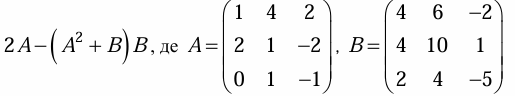

In [43]:
A_arr = [[1, 4, 2],
         [2, -1, 2],
         [0, 1, -1]]

B_arr = [[4, 6, -2],
         [4, 10, 1],
         [2, 4, -5]]

A = np.array(A_arr)
B = np.array(B_arr)

In [49]:
@time_it
def np_solution(A, B):
    result = 2 * A - (A @ A + B) @ B
    return result

print(np_solution(A, B))

Function 'np_solution' executed in: 0.000039 seconds
[[ -94 -174   52]
 [ -98 -240   -4]
 [ -20  -34   -6]]


In [50]:
def matrix_add(A, B):
    rows = len(A)
    cols = len(A[0])
    
    result = [[0 for _ in range(cols)] for _ in range(rows)]
    
    for i in range(rows):
        for j in range(cols):
            result[i][j] = A[i][j] + B[i][j]

    return result

def matrix_subtract(A, B):
    rows = len(A)
    cols = len(A[0])
    
    result = [[0 for _ in range(cols)] for _ in range(rows)]
    
    for i in range(rows):
        for j in range(cols):
            result[i][j] = A[i][j] - B[i][j]

    return result

def matrix_multiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        raise ValueError("Matrix dimensions do not match")

    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result

def scalar_multiply(matrix, scalar):
    return [[element * scalar for element in row] for row in matrix]

@time_it
def manual_solution(A, B):
    temp = matrix_add(matrix_multiply(A, A), B)
    result = matrix_subtract(scalar_multiply(A, 2), matrix_multiply(temp, B))
    return result

matrix = manual_solution(A_arr, B_arr)
for row in matrix:
    print(row)

Function 'manual_solution' executed in: 0.000032 seconds
[-94, -174, 52]
[-98, -240, -4]
[-20, -34, -6]


In [51]:
numpy_result = np_solution(A, B)
manual_result = manual_solution(A_arr, B_arr)

is_close = np.allclose(numpy_result, manual_result)
print("Are numpy and manual solution same:", is_close)

Function 'np_solution' executed in: 0.000048 seconds
Function 'manual_solution' executed in: 0.000035 seconds
Are numpy and manual solution same: True
